Name: Salman Sarfaraz Ghori          KAUST ID: 183854            salman.ghori@kaust.edu.sa

Name: Mohammed Aasim Shaikh          KAUST ID: 179008            mohammedaasim.shaikh@kaust.edu.sa

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from numpy import linalg as la

In [85]:
#f(x1,x2) = 10(x2-x1^2)^2 + (1-x1)^2
#Rosenbrock function
#using lambda
#syntax:
#lambda arguments : expression ---> a kind textual substition
f = lambda x1, x2: 10*(x2-x1**2)**2 + (1-x1)**2; 
#define as per assigment requirements
def rosen(x):
  f = 10 * (x[1] -x[0]**2)**2 + (1 - x[0])**2;
  return f

<Figure size 432x288 with 0 Axes>

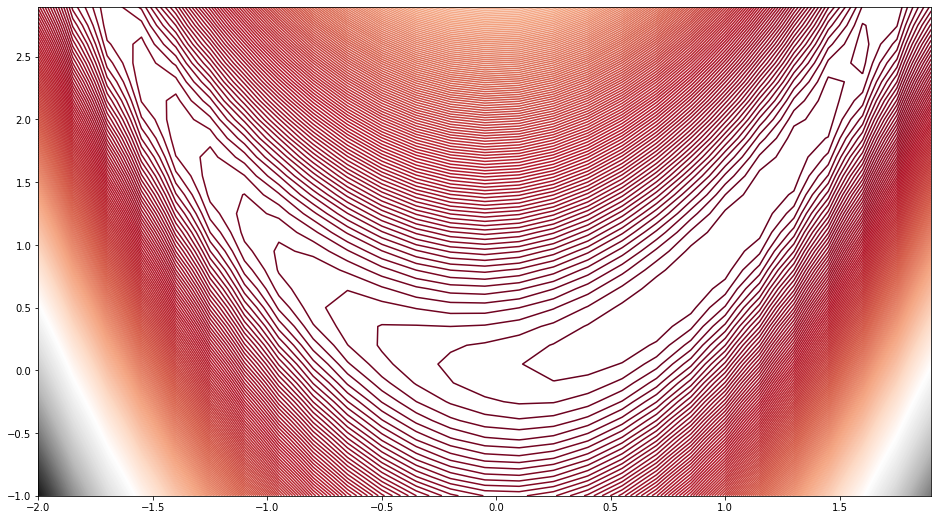

In [86]:
#Function Plot
#ploting---> visualization of function in 2d contour
plt.figure()
x1 = np.arange(-2, 2, 0.15)
x2 = np.arange(-1, 3, 0.15)
x, y = np.meshgrid(x1, x2)
z = f(x,y); #Function call and passing the argument
plt.figure(figsize=(16, 9))
plt.contour(x, y, z,  400, cmap='RdGy');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


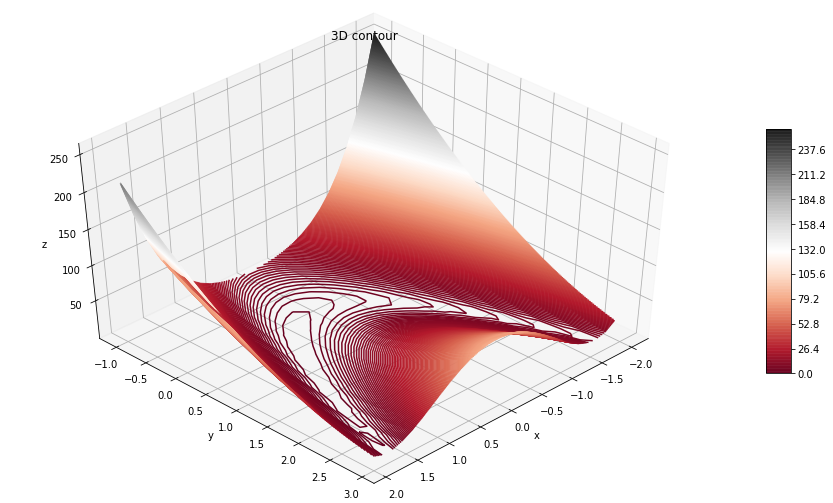

In [87]:
#ploting---> visualization of function in 3d contour
fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection='3d')
surf = ax.contour3D(x, y, z, 400, cmap='RdGy')
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.view_init(45, 45)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()

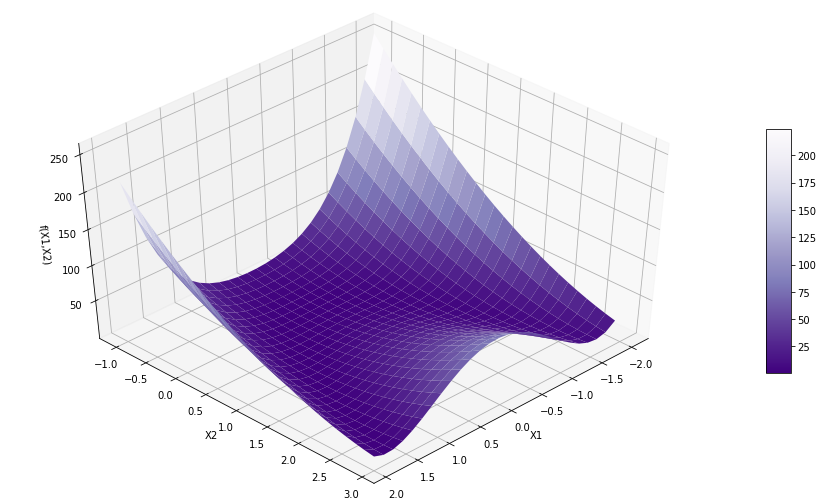

In [88]:
#ploting---> visualization of function in 3d
fig = plt.figure(figsize=(16, 9))
ax = fig.gca(projection="3d")
surf = ax.plot_surface(x, y, z, cmap='Purples_r')
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.view_init(45, 45)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("f(X1,X2)")
plt.show()

In [89]:
#Gradient Computation
#partial derivatives of the Rosenbrock function analytically 
#∇f(x1,x2) = [−40*x1*(x2 − x1^2) + 2*x1 − 2; 20 ∗ (x2 − x1^2)]
# the partial derivatives of the Rosenbrock function
#d_f = lambda x1,x2: np.array([-40*x1*(x2 - x1**2) + 2*x1 - 2, 20*(x2 - x1**2) ])
def rosen_grad(x):
  g = np.zeros(2)
  g[0] = -40*x[0]*(x[1] - x[0]**2) + 2*x[0] - 2
  g[1] = 20*x[1] - 20*x[0]**2
  return g


In [90]:
#Line Search Framework
#Backtracking Line Search
#the Armijo condition: sufficient descent conditions 
def backtrack_linesearch(f, gk, pk, xk, alpha = 0.1, beta = 0.8):
  t = 1
  while ( f(xk + t*pk) > f(xk) + alpha * t * gk @ pk ):
    t *= beta
    #print ("===",t)
  return t
count = 0 
#Line Search Framework for Unconstrained Minimization
#Lipschitz continuity
def steepest_descent_bt(f, grad, x0, tol = 1e-5):
  x = x0
  history = np.array( [x0] )
  #print("initial position",x)
  count = 0
  while ( la.norm(grad(x)) > tol ):
    p = -grad(x)
    #print("direction", p)
    t = backtrack_linesearch(f, grad(x), p, x)
    x += t * p
    #print("new position",x)
    count = count + 1
    history = np.vstack( (history, x) )
    #print("history position",history)
  return x, history,count

In [91]:
#initial position
x_0 = np.array([-1.2,1.0])
print(f(x_0[0], x_0[1]))
print(rosen_grad(x_0))

6.776000000000001
[-25.52  -8.8 ]


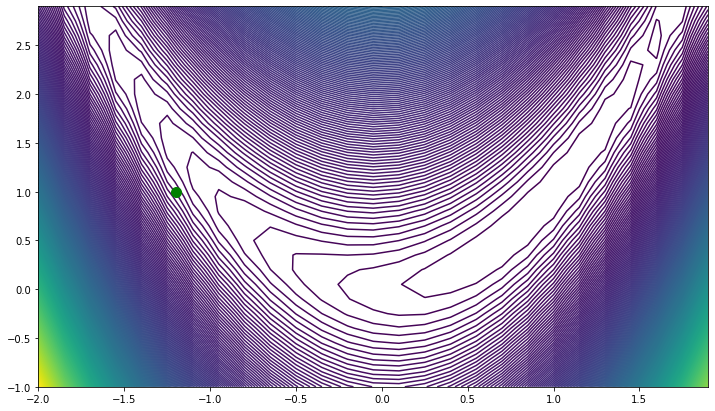

In [92]:
#initial position on contour
plt.figure(figsize=(12, 7))
plt.contour(x,y,z,400)
plt.plot([x_0[0]],[x_0[1]],marker='o',markersize=10, color ='g')

In [93]:
s = -rosen_grad(x_0);
print(s)

[25.52  8.8 ]


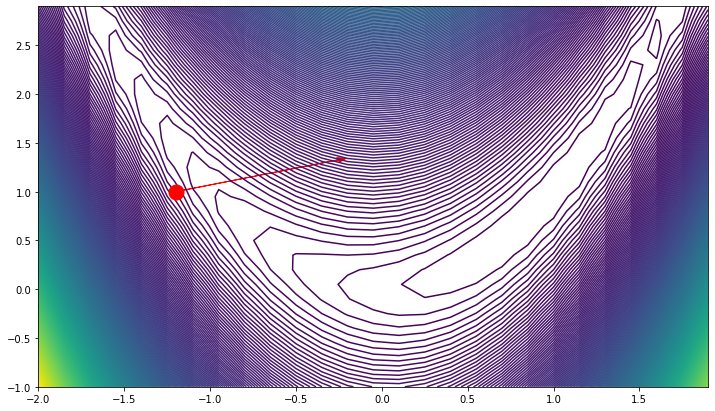

In [94]:
#representing negative gradient direction
plt.figure(figsize=(12, 7))
plt.contour(x,y,z,400)
ns = np.sqrt(s[0]**2+s[1]**2);
plt.plot([x_0[0]],[x_0[1]],marker='o',markersize=15, color ='r')
plt.arrow(x_0[0],x_0[1],s[0]/ns,s[1]/ns, head_width=0.05, head_length=0.05, fc='r', ec='r')

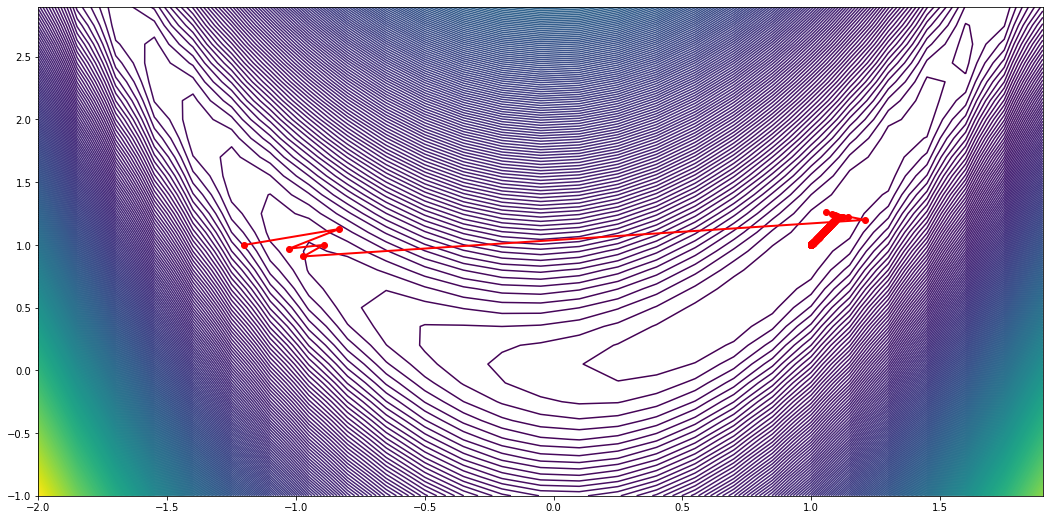

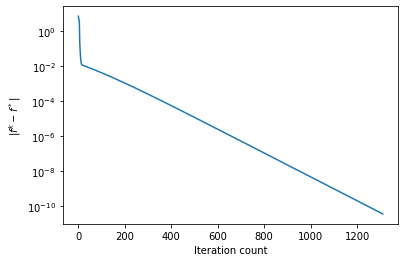

1310


In [95]:
#Backtracking Line Search and tracking
xstar, hist, count = steepest_descent_bt(rosen, rosen_grad, x_0)
plt.figure(figsize=(18, 9))
plt.contour(x,y,z,400)
#plt.scatter(hist[:,0], hist[:,1])
t = plt.plot(hist[:,0], hist[:,1],'ro-',linewidth=2)
#t.colorbar(surf, shrink=0.5, aspect=10)
#plt.show()
#print(hist[:,1])
#plot convergence behavior
nsteps = hist.shape[0]
fhist = np.zeros(nsteps)
for i in range(nsteps):
  fhist[i] = rosen(hist[i,:])
plt.figure('convergence')
plt.semilogy(np.arange(0, nsteps), np.absolute(fhist))
plt.xlabel('Iteration count')
plt.ylabel(r'$|f^k - f^*|$')
plt.show()

print (count)
#print (rosen_grad(hist[-1]))

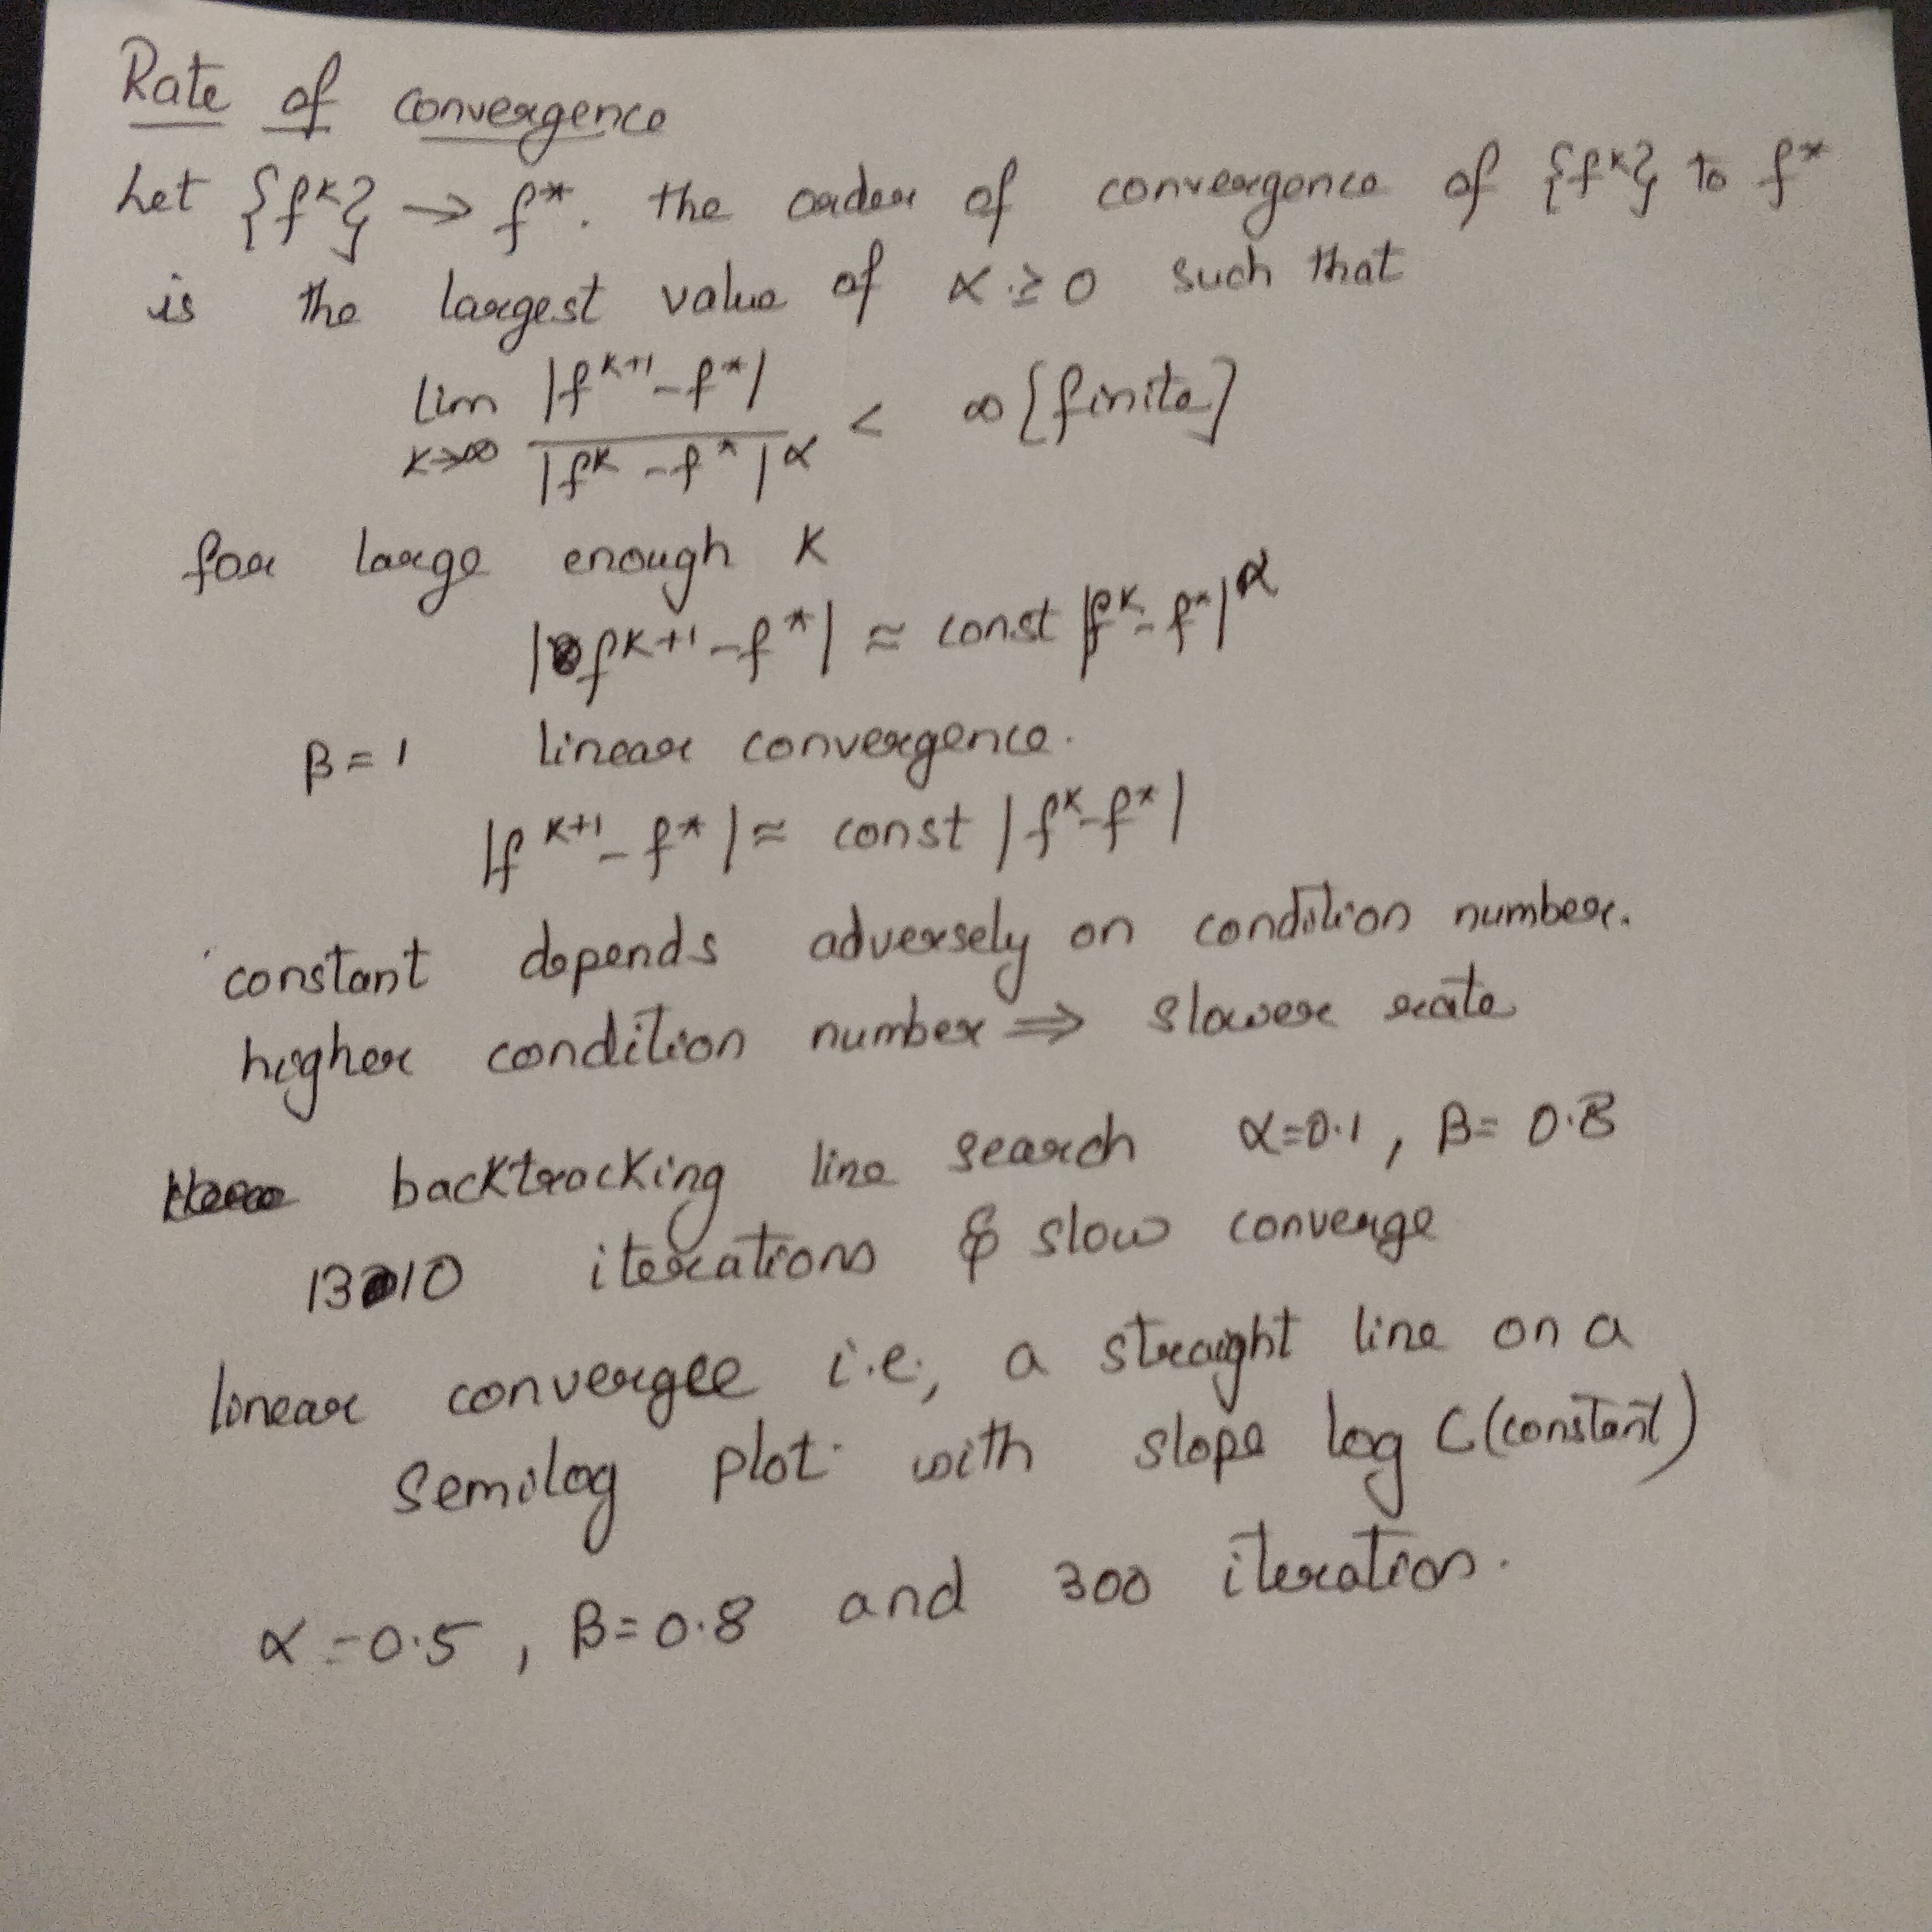